<a href="https://colab.research.google.com/github/Tejasree-Goli/CMPE-257-Project/blob/main/Project_dir/code/app/05_KNN_Pavan_Satyam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
!pip install scikit-plot
import scikitplot as skplt
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install stop_words

# NLP modules
import nltk
import re 
import string
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob , Word
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Wordcloud Modules
from wordcloud import WordCloud , STOPWORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=8b68e2cf3366c0a438f078c7404b766d09f022711aaa77c908dc318e9aef56d1
  Stored in directory: /root/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words


In [4]:
color = sns.color_palette()
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)
nltk.download("stopwords")
nltk.download("all")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]   

True

In [5]:
reviews_df=pd.read_csv('/content/drive/MyDrive/cmpe257/merged.csv')
reviews_df.head(5)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV13V_i2glJLPUi8PFgb          Toshiba   
2  AV13V_i2glJLPUi8PFgb          Toshiba   
3  AV13V_i2glJLPUi8PFgb          Toshiba   
4  AV13V_i2glJLPUi8PFgb          Toshiba   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Internal Solid State Drives,Computers & Access...  2017-07-25T01:24:00Z   
2  Internal Solid State Drives,Computers & Access...  2017-07-25T01:24:00Z   
3  Internal Solid State Drives,Computers & Access...  2017-07-25T01:24:00Z   
4  Internal Solid State Drives,Computers & Access...  2017-07-25T01:24:00Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-06-01T19:31:33Z          NaN   
2  2018-06-01T19:31:33Z          NaN   
3  2018-06-01T19:31:33Z          NaN   
4  2018-06-01T19:31:33Z          NaN   

                                                keys  \
0  602537205981,universalmusic/14331328,universal...   
1  toshiba3tbinternalserialataiiiharddrivefordesk...   
2  toshiba3tbinternalserialataiiiharddrivefordesk...   
3  toshiba3tbinternalserialataiiiharddrivefordesk...   
4  toshiba3tbinternalserialataiiiharddrivefordesk...   

                         manufacturer manufacturerNumber  \
0  Universal Music Group / Cash Money           14331328   
1                                 NaN       PH3300U-1I72   
2                                 NaN       PH3300U-1I72   
3                                 NaN       PH3300U-1I72   
4                                 NaN       PH3300U-1I72   

                                                name  ... reviews.id  \
0          Pink Friday: Roman Reloaded Re-Up (w/dvd)  ...        NaN   
1  Toshiba - 3TB Internal Serial ATA III Hard Dri...  ...        NaN   
2  Toshiba - 3TB Internal Serial ATA III Hard Dri...  ...        NaN   
3  Toshiba - 3TB Internal Serial ATA III Hard Dri...  ...        NaN   
4  Toshiba - 3TB Internal Serial ATA III Hard Dri...  ...        NaN   

  reviews.userCity reviews.userProvince       asins  colors dimension  \
0      Los Angeles                  NaN         NaN     NaN       NaN   
1              NaN                  NaN  B009E6J1BU     NaN       NaN   
2              NaN                  NaN  B009E6J1BU     NaN       NaN   
3              NaN                  NaN  B009E6J1BU     NaN       NaN   
4              NaN                  NaN  B009E6J1BU     NaN       NaN   

                                           imageURLs primaryCategories  \
0                                                NaN               NaN   
1  https://images-na.ssl-images-amazon.com/images...       Electronics   
2  https://images-na.ssl-images-amazon.com/images...       Electronics   
3  https://images-na.ssl-images-amazon.com/images...       Electronics   
4  https://images-na.ssl-images-amazon.com/images...       Electronics   

                                          sourceURLs    weight  
0                                                NaN       NaN  
1  http://www.bestbuy.com/site/toshiba-3tb-intern...  2 ounces  
2  http://www.bestbuy.com/site/toshiba-3tb-intern...  2 ounces  
3  http://www.bestbuy.com/site/toshiba-3tb-intern...  2 ounces  
4  http://www.bestbuy.com/site/toshiba-3tb-intern...  2 ounces  

[5 rows x 32 columns]

In [6]:
reviews_df.shape

(78343, 32)

In [7]:
#Columns/attributes and their datatypes
reviews_df.dtypes

id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateSeen         object
reviews.doRecommend      object
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.username         object
upc                      object
reviews.dateAdded        object
reviews.didPurchase      object
reviews.id              float64
reviews.userCity         object
reviews.userProvince     object
asins                    object
colors                   object
dimension                object
imageURLs                object
primaryCategories        object
sourceURLs               object
weight  

In [8]:
reviews_df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     36327
keys                        0
manufacturer             2808
manufacturerNumber        203
name                        0
reviews.date              128
reviews.dateSeen            0
reviews.doRecommend     12006
reviews.numHelpful      40022
reviews.rating            164
reviews.sourceURLs          0
reviews.text               41
reviews.title             480
reviews.username           96
upc                         2
reviews.dateAdded        7299
reviews.didPurchase     46185
reviews.id              46185
reviews.userCity        72933
reviews.userProvince    77894
asins                   71044
colors                  73063
dimension               72253
imageURLs               71044
primaryCategories       71044
sourceURLs              71044
weight                  71044
dtype: int64

In [9]:
reviews_df = reviews_df.dropna(subset=['reviews.text']) #dropping null reviews text
reviews_df = reviews_df.dropna(subset=['reviews.title']) #dropping null reviews title
reviews_df = reviews_df.dropna(subset=['reviews.rating']) #dropping null ratings

In [10]:
reviews_df.shape

(77670, 32)

Checking the duplicate rows and dropping them

In [11]:
reviews_df.duplicated(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date']).sum()

761

In [12]:
reviews_df=reviews_df.drop_duplicates(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date'])

In [13]:
reviews_df.shape

(76909, 32)

Making title and review as one sentence

In [14]:
reviews_df["full_review"] = reviews_df['reviews.title'].astype(str) +" "+ reviews_df["reviews.text"]

In [15]:
reviews_df["full_review"] = (
    reviews_df["full_review"]
    .str.lower()
    .str.replace("[^\w\s]", "")
    .str.replace("\d+", "")
    .str.replace("\n", " ")
    .replace("\r", "")
    .str.replace("[^a-zA-Z0-9\s]", "")
)

In [16]:
reviews_df['full_review']

0        just awesome i love this album its very good m...
1        perfect for my workstation used to be a seagat...
2        works well in an enclosure installed in an enc...
3        good brand used to be a seagate fan for their ...
4        great product fantastic product the sata cable...
                               ...                        
78338    its ok ue took away features for a louder spea...
78339    amazing love it sounds is great nice  loud tot...
78340    awesome sound but no party mode this thing rea...
78341    very good sound this speaker is great the soun...
78342    love this speaker this speark plays well it is...
Name: full_review, Length: 76909, dtype: object

Removing other characters other than letters

In [17]:
def word_cleaner(data):
    words = [re.sub("[^a-zA-Z]", " ", i) for i in data]
    words = [i.lower() for j in words for i in j.split()] # Split all the sentences into words
    words = [i for i in words if not i in set(stopwords.words("english"))] # Split all the sentences into words
    return words

In [18]:
word_frequency = pd.DataFrame(
    nltk.FreqDist(word_cleaner(reviews_df["full_review"])).most_common(25),
    columns=["Frequent_Words", "Frequency"],
)

Finding most frequent words

In [19]:
plt.figure(figsize=(8, 8))
plt.xticks(rotation=90)
plt.title("Most frequently used words in reviews")
sns.barplot(x="Frequent_Words", y="Frequency", data=word_frequency)

In [20]:
lemmatizer_output = WordNetLemmatizer()

reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: word_tokenize(x.lower())
)
reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: [word for word in x if word not in STOPWORDS]
)
reviews_df["full_review"] = reviews_df["full_review"].apply(
    lambda x: [lemmatizer_output.lemmatize(word) for word in x]
)
reviews_df["full_review"] = reviews_df["full_review"].apply(lambda x: " ".join(x))

In [21]:
reviews_df['full_review'].head(15)

0     awesome love album good hip hop side current p...
1     perfect workstation used seagate fan yr warran...
2     work well enclosure installed enclosure hooked...
3     good brand used seagate fan yr warranty hard r...
4     great product fantastic product sata cable fit...
5     good husband installed computer couldnt find d...
6     drive work ok configure drive level raid dns u...
7     work great replaced another hard drive really ...
8     bad price ups down installing physically easy ...
9     cheap barebones three year warranty hard perfe...
10    excellent product memory card sony alpha digit...
11    great bang buck ordered build computer one wor...
12    nice price chose one based price ive toshiba d...
13    excellent price preformed expected wonderful p...
14    great amount space price purchased son replace...
Name: full_review, dtype: object

In [22]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=250,
        max_font_size=45,
        scale=4,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=21)
        fig.subplots_adjust(top=2.1)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(reviews_df["full_review"])


[Text(0.5, 1.0, 'Frequency of each rating')]

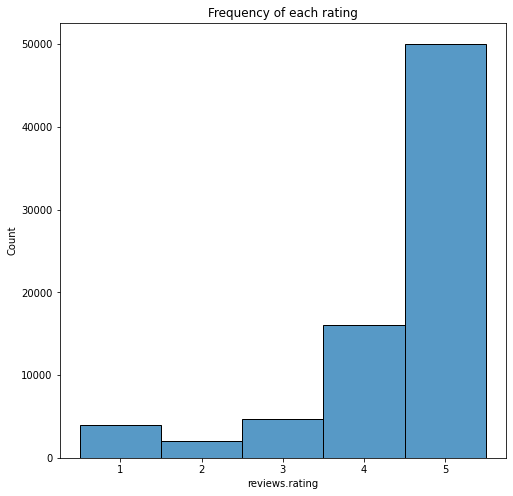

In [23]:
plt.figure(figsize=(8,8))
sns.histplot(data=reviews_df, x=reviews_df['reviews.rating'], discrete="True").set(title = "Frequency of each rating")

In [24]:
#review by brand
reviews_df.groupby(reviews_df['brand']).mean()['reviews.rating']

brand
4C Foods               5.000000
AMBI                   4.750000
ANCHOR BAY             4.766667
Adesso                 5.000000
Advantage              4.000000
                         ...   
Yes to Grapefruit      3.846154
Yosemite Home Decor    1.000000
Zyliss                 4.644068
bareMinerals           5.000000
iStarUSA               3.000000
Name: reviews.rating, Length: 397, dtype: float64

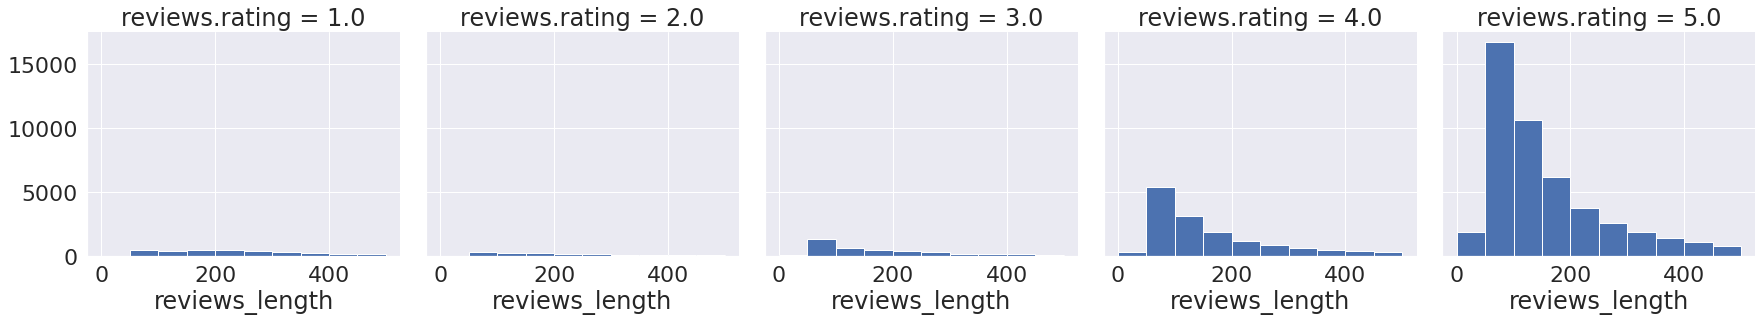

In [25]:
reviews_df["reviews_length"] = reviews_df["reviews.text"].apply(len)
sns.set(font_scale=2.0)

graph = sns.FacetGrid(reviews_df,col='reviews.rating',size=5)
graph.map(plt.hist,'reviews_length', range=[0, 500])

In [26]:
reviews_df['reviews.doRecommend'].fillna("N/A",inplace=True)

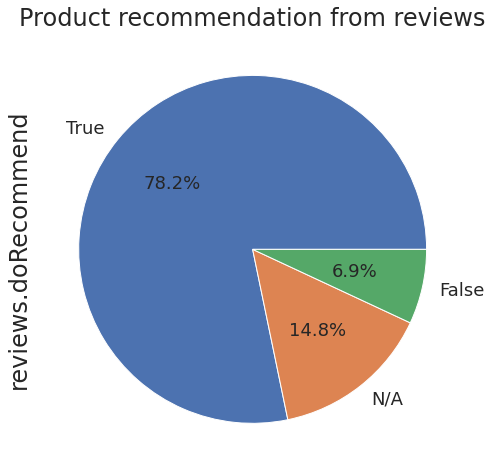

In [27]:
plt.figure(figsize = (8,8))
plt.title("Product recommendation from reviews")
reviews_df["reviews.doRecommend"].value_counts().plot.pie(autopct="%1.1f%%",textprops={'fontsize': 18})

Text(0, 0.5, 'No. of people that found the review helpful')

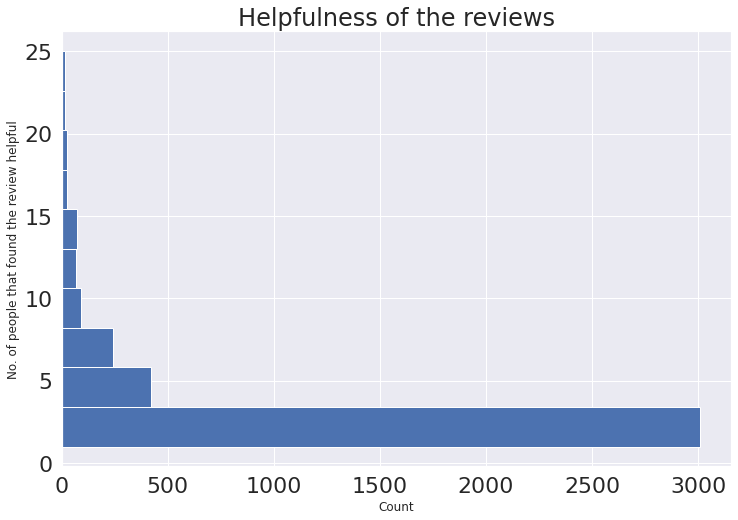

In [28]:
plt.figure(figsize=(12,8))
plt.hist(reviews_df['reviews.numHelpful'],range=[1, 25], orientation='horizontal')
plt.title("Helpfulness of the reviews")
plt.xlabel("Count", fontsize=12)
plt.ylabel("No. of people that found the review helpful", fontsize=12)

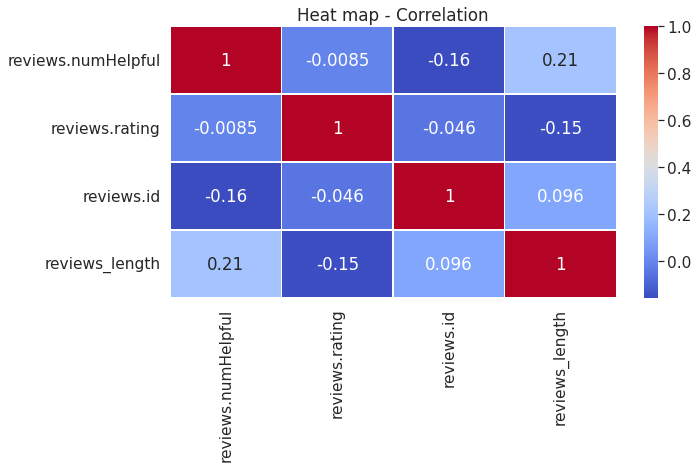

In [29]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
plt.title("Heat map - Correlation")
sns.heatmap(reviews_df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [30]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Data Fitting

In [31]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [32]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

whole_text = reviews_df['full_review']
train_text = reviews_df['full_review']
y_ratings = reviews_df['reviews.rating']

In [33]:
word_vec = TfidfVectorizer(sublinear_tf = True, strip_accents = 'unicode', analyzer = 'word', token_pattern = r'\w{1,}', stop_words = 'english', ngram_range = (1, 1), max_features=10000)
word_vec.fit(whole_text)
train_features = word_vec.transform(train_text)

In [34]:
train_features

<76909x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1251842 stored elements in Compressed Sparse Row format>

#Undersampling

In [35]:
nm = NearMiss()
X_undersample, y_undersample = nm.fit_resample(train_features, y_ratings)

#Oversampling


In [36]:
smote = SMOTE(random_state=42)
X_oversample, y_oversample= smote.fit_resample(train_features, y_ratings)

In [37]:
print('Original dataset shape %s' % Counter(y_ratings))
print('Oversampled dataset shape %s' % Counter(y_oversample))

Original dataset shape Counter({5.0: 50041, 4.0: 16101, 3.0: 4743, 1.0: 3990, 2.0: 2034})
Oversampled dataset shape Counter({5.0: 50041, 1.0: 50041, 4.0: 50041, 3.0: 50041, 2.0: 50041})


#Model Preparation for KNN

In [38]:
from sklearn.model_selection import train_test_split
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(train_features, y_ratings, test_size=0.3, random_state=101)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversample, y_oversample, test_size=0.3, random_state=101)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
kn_us = KNeighborsClassifier(n_neighbors=3)
kn_us.fit(X_train_us,y_train_us)
kn_pred_us = kn_us.predict(X_test_us)
print(kn_pred_us)
kn_us.score(X_train_us, y_train_us)

[4. 5. 5. ... 5. 2. 5.]


0.48728754038488553

In [40]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train,y_train)
kn_pred = kn.predict(X_test)

print(kn_pred)
kn.score(X_train, y_train)


[2. 5. 5. ... 5. 5. 2.]


0.9149453897020581

In [41]:
y_train

54245    4.0
70023    5.0
31428    4.0
50312    5.0
24488    4.0
        ... 
56426    5.0
50867    5.0
5777     4.0
74963    5.0
47019    5.0
Name: reviews.rating, Length: 53836, dtype: float64

In [52]:
kn_pred_train_os= kn.predict(X_train_os)


[3. 5. 4. ... 5. 5. 5.]


In [53]:
print(kn_pred_train_os)


[5. 5. 1. ... 2. 1. 3.]


In [43]:
kn.score(X_train,kn_pred_train_os)

1.0

In [44]:
kn_os = KNeighborsClassifier(n_neighbors=3)
kn_os.fit(X_train_os,y_train_os)
kn_pred_os = kn_os.predict(X_test_os)
print(kn_pred_os)
kn_os.score(X_train_os, y_train_os)

[2. 2. 4. ... 4. 4. 1.]


0.8679193573251571

In [45]:
filename = '/content/drive/MyDrive/cmpe257/kn_us.sav'
pickle.dump(kn_us, open(filename, 'wb'))
filename = '/content/drive/MyDrive/cmpe257/kn.sav'
pickle.dump(kn, open(filename, 'wb'))
filename = '/content/drive/MyDrive/cmpe257/kn_os.sav'
pickle.dump(kn_os, open(filename, 'wb'))

Testing score

In [46]:
from sklearn.metrics import classification_report
print("Classification report for Undersampled data using KNeighborsClassifier.")
print(classification_report(y_test_us, kn_pred_us, labels=[1, 2, 3, 4, 5]))
print("\nClassification report for Original (no resampling) data using KNeighborsClassifier.")
print(classification_report(y_test, kn_pred, labels=[1, 2, 3, 4, 5]))
print("\nClassification report for Oversampled data using KNeighborsClassifier.")
print(classification_report(y_test_os, kn_pred_os, labels=[1, 2, 3, 4, 5]))

Classification report for Undersampled data using KNeighborsClassifier.
              precision    recall  f1-score   support

           1       0.73      0.18      0.29       608
           2       0.15      0.02      0.03       589
           3       0.40      0.14      0.21       621
           4       0.51      0.23      0.32       638
           5       0.19      0.75      0.31       595

    accuracy                           0.26      3051
   macro avg       0.40      0.26      0.23      3051
weighted avg       0.40      0.26      0.23      3051


Classification report for Original (no resampling) data using KNeighborsClassifier.
              precision    recall  f1-score   support

           1       0.79      0.29      0.43      1149
           2       0.05      0.83      0.09       600
           3       0.39      0.15      0.22      1457
           4       0.43      0.15      0.22      4870
           5       0.80      0.54      0.64     14997

    accuracy                

training score


In [55]:
print("\nClassification report for Oversampled data using KNeighborsClassifier.")
print(classification_report(y_train_os, kn_pred_train_os, labels=[1, 2, 3, 4, 5]))


Classification report for Oversampled data using KNeighborsClassifier.
              precision    recall  f1-score   support

           1       0.97      0.85      0.90     34942
           2       0.65      0.93      0.76     35232
           3       0.94      0.72      0.81     35010
           4       0.88      0.59      0.71     34878
           5       0.69      0.86      0.76     35081

    accuracy                           0.79    175143
   macro avg       0.82      0.79      0.79    175143
weighted avg       0.82      0.79      0.79    175143



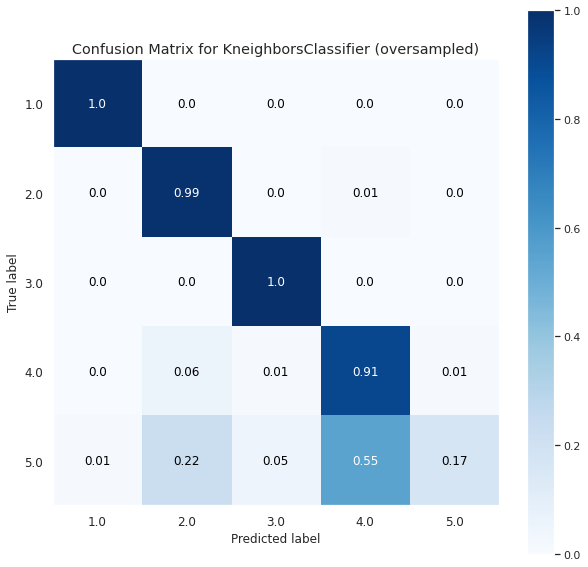

In [47]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_confusion_matrix(y_test_os, kn_pred_os, normalize=True, title = 'Confusion Matrix for KneighborsClassifier (oversampled)')
plt.show()

In [48]:
probas2 = kn_os.predict_proba(X_test_os)
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
skplt.metrics.plot_precision_recall_curve(y_test_os, probas2)
plt.show()

In [49]:
from sklearn.metrics import log_loss
probas2_us = kn_us.predict_proba(X_test_us)
probas2_ = kn.predict_proba(X_test)
print("Log loss for undersampled data on KNeighborsClassifier")
print(log_loss(y_test_us, probas2_us))
print("\nLog loss for original (no resampling) data on KNeighborsClassifier")
print(log_loss(y_test, probas2_))
print("\nLog loss for oversampled data on KNeighborsClassifier")
print(log_loss(y_test_os, probas2))

Log loss for undersampled data on KNeighborsClassifier
14.01998992930914

Log loss for original (no resampling) data on KNeighborsClassifier
5.1790895203157215

Log loss for oversampled data on KNeighborsClassifier
4.362708391429757


#Test cases

In [50]:
custom_test = word_vec.transform(["so satisfied with the purchase good product works well", "this device feels ok it works fine", "really disappointed with the purchase defective product not working", "used to be good but since the change the worst product ever", "used to be bad but from when it was updated it is the best product ever"])

In [51]:
kn_os.predict(custom_test)

array([4., 3., 2., 1., 2.])